In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.	“1.txt” 파일을 읽어서 각 글자(알파벳)별로 나타나는 횟수를 계산하여, 가장 많이 나오는 글자 10개를 순서대로 histogram을 생성하세요(x 축 : 글자, y 축 : 출현횟수).

In [113]:
with open('1.txt', 'r') as f:
    lines = f.readlines()
    
charcount = {}
for l in lines:
    for c in l:
        char = c.lower()
        if char == ' ':
            continue
        if char in charcount.keys():
            charcount[char] = charcount[char] + 1
        else:
            charcount[char] = 1

In [114]:
res = sorted(charcount.items(), key=(lambda x: x[1]), reverse=True)
res

[('e', 403),
 ('i', 372),
 ('u', 351),
 ('s', 335),
 ('t', 284),
 ('a', 275),
 ('l', 214),
 ('n', 212),
 ('r', 192),
 ('m', 176),
 ('c', 158),
 ('o', 138),
 ('.', 109),
 ('d', 95),
 ('p', 88),
 (',', 72),
 ('v', 51),
 ('q', 47),
 ('g', 43),
 ('b', 40),
 ('f', 34),
 ('h', 22),
 ('w', 13),
 ('\n', 10),
 ('j', 7),
 ('"', 4),
 ('y', 4),
 (';', 2),
 ('k', 1)]

<BarContainer object of 10 artists>

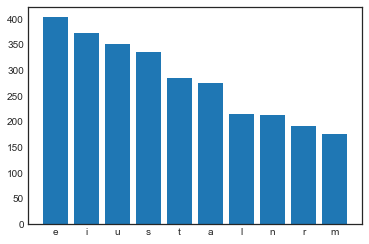

In [119]:
x = [x[0] for x in res[:10]]
y = [x[1] for x in res[:10]]
plt.bar(x, y)

“2.txt” 파일은 타이타닉호의 승객 정보와 생존여부에 관한 데이터이다. 이 데이터를 이용하여 승객의 생존여부(survived)를 예측 하는 예측모델을 생성하려고 한다. ( 2번 ~ 4번)

2.	데이터의 결측치(Missing Value)를 찾아내어 적절한 조치를 취하세요.

In [120]:
df = pd.read_csv('2.txt', sep='|')

In [121]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [122]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [124]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [125]:
df = df.drop('deck', axis=1)

In [126]:
df['age'].fillna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [127]:
df['age'] = df.groupby(['sex', 'class'])['age'].transform(lambda x: x.fillna(x.mean()))

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

In [129]:
df['age'] = df['age'].fillna(df['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [132]:
 df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [133]:
df.groupby('embarked').count()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
embarked,,,,,,,,,,,,,
C,168,168,168,130,168,168,168,168,168,168,168,168,168
Q,77,77,77,28,77,77,77,77,77,77,77,77,77
S,644,644,644,554,644,644,644,644,644,644,644,644,644


3.	예측 모델을 생성하기 위한 변수를 선택하고 그 이유를 설명하세요. 

In [134]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [148]:
(df.query('pclass == 3')['class'] == 'Third').all()

True

4.	예측 모델을 생성하기 위하여 가장 알맞게 데이터를 7:3(training data : test data) 비율로 나누세요. 

In [150]:
livedf = df.query('survived == 1')
deaddf = df.query('survived == 0')

In [156]:
livetran = livedf.sample(frac=0.7)
livetest = livedf.drop(livetran.index)

In [158]:
print(len(livedf))
print(len(livetran))
print(len(livetest))

342
239
103


In [162]:
deadtran = deaddf.sample(frac=0.7)
deadtest = deaddf.drop(deadtran.index)
print(len(deaddf))
print(len(deadtran))
print(len(deadtest))

549
384
165


In [160]:
train = pd.concat([livetran, deadtran])
test = pd.concat([livetest, deadtest])

In [161]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
192,1,3,female,19.0,1,0,7.8542,S,Third,woman,False,Southampton,yes,False
82,1,3,female,NaN,0,0,7.7875,Q,Third,woman,False,Queenstown,yes,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,Southampton,yes,True
489,1,3,male,9.0,1,1,15.9000,S,Third,child,False,Southampton,yes,False
141,1,3,female,22.0,0,0,7.7500,S,Third,woman,False,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,0,2,male,23.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
810,0,3,male,26.0,0,0,7.8875,S,Third,man,True,Southampton,no,True
588,0,3,male,22.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
852,0,3,female,9.0,1,1,15.2458,C,Third,child,False,Cherbourg,no,False


5.	 Entertainment 로 가장 많이 사용한 월(1월 ~ 12월)과 Transportation 으로 가장 많이 사용한 일(1일 ~ 31일)을 구하세요.

In [165]:
u = pd.read_csv('cardusages.csv')
t = pd.read_csv('usagestype.csv')

In [166]:
u.head()

,date,card_number,type,amount
0,2020-09-03,30266797916450,R,270
1,2020-07-14,180000986833798,T,783
2,2018-01-05,347290566535273,E,714
3,2018-02-24,3524037806145911,R,172
4,2018-08-24,6542360089494884,R,539


In [167]:
t.head()

,Index,type
0,C,Clothes
1,E,Entertainment
2,R,Rent
3,T,Transportation
4,F,Food_Drink


In [174]:
card = u.merge(t, left_on='type', right_on='Index', how='inner')

In [175]:
card.head()

,date,card_number,type_x,amount,Index,type_y
0,2020-09-03,30266797916450,R,270,R,Rent
1,2018-02-24,3524037806145911,R,172,R,Rent
2,2018-08-24,6542360089494884,R,539,R,Rent
3,2018-09-02,3575129580850846,R,13,R,Rent
4,2020-05-13,6576493168332284,R,424,R,Rent


In [176]:
card.drop('type_x', axis=1, inplace=True)
card.rename(columns={'type_y': 'type'}, inplace=True)

In [177]:
card.head()

,date,card_number,amount,Index,type
0,2020-09-03,30266797916450,270,R,Rent
1,2018-02-24,3524037806145911,172,R,Rent
2,2018-08-24,6542360089494884,539,R,Rent
3,2018-09-02,3575129580850846,13,R,Rent
4,2020-05-13,6576493168332284,424,R,Rent


In [181]:
card['month'] = card['date'].apply(lambda x: x.split('-')[1])
card['day'] = card['date'].apply(lambda x: x.split('-')[2])
card.head()

,date,card_number,amount,Index,type,month,day
0,2020-09-03,30266797916450,270,R,Rent,09,03
1,2018-02-24,3524037806145911,172,R,Rent,02,24
2,2018-08-24,6542360089494884,539,R,Rent,08,24
3,2018-09-02,3575129580850846,13,R,Rent,09,02
4,2020-05-13,6576493168332284,424,R,Rent,05,13


In [182]:
g = card.groupby(['type', 'month']).agg({'amount':'sum'})

In [187]:
usages = card.query('type == "Entertainment"').groupby('month').agg({'amount':'sum'})

In [192]:
usages.sort_values('amount', ascending=False)

,amount
month,
09,75120
12,73599
04,70965
03,70783
08,68024
01,67772
05,67749
10,67344
02,62186


6.	각 사용처별 사용량을 꺽은선 그래프(line plot)로 그리고, 각 사용처 분류 이름을 범례로 표시하세요. ( x 축 : 사용일, y 축 : 사용량)

In [204]:
amount = card.groupby(['type', 'date']).agg({'amount':'sum'}).reset_index()

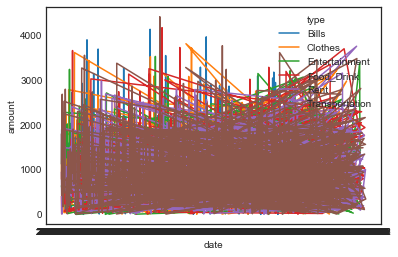

In [208]:
import seaborn as sns

sns.lineplot(data=amount, x='date', y = 'amount', hue='type')